<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dogs-v-Cats" data-toc-modified-id="Dogs-v-Cats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dogs v Cats</a></span></li><li><span><a href="#Get-the-data-(Smaller-Dataset)" data-toc-modified-id="Get-the-data-(Smaller-Dataset)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Get the data</strong> (Smaller Dataset)</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Import libraries</strong></a></span></li><li><span><a href="#Create-the-respective-directories" data-toc-modified-id="Create-the-respective-directories-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Create the respective directories</strong></a></span></li><li><span><a href="#Model-with-4-convolutional-layers-with-32,-64,-128-and-128-convolutions-respectively" data-toc-modified-id="Model-with-4-convolutional-layers-with-32,-64,-128-and-128-convolutions-respectively-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Model with 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively</strong></a></span></li><li><span><a href="#Rescale-the-Images" data-toc-modified-id="Rescale-the-Images-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Rescale the Images</strong></a></span><ul class="toc-item"><li><span><a href="#Flow-images-in-batches-of-20-using-train-_datagen-and-test_datagen" data-toc-modified-id="Flow-images-in-batches-of-20-using-train-_datagen-and-test_datagen-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><strong>Flow images in batches of 20 using train _datagen and test_datagen</strong></a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Training</strong></a></span><ul class="toc-item"><li><span><a href="#Accuracy-and-Loss" data-toc-modified-id="Accuracy-and-Loss-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><strong>Accuracy and Loss</strong></a></span></li></ul></li><li><span><a href="#Here's-the-code-with-added-Image-Augmentation." data-toc-modified-id="Here's-the-code-with-added-Image-Augmentation.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><strong>Here's the code with added Image Augmentation.</strong></a></span></li><li><span><a href="#Appluing-Droput" data-toc-modified-id="Appluing-Droput-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Appluing Droput</a></span></li><li><span><a href="#Save-and-load-model" data-toc-modified-id="Save-and-load-model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Save and load model</a></span></li><li><span><a href="#Our-Model-in-action" data-toc-modified-id="Our-Model-in-action-11"><span class="toc-item-num">11&nbsp;&nbsp;</span><strong>Our Model in action</strong></a></span></li></ul></div>

# Dogs v Cats
**End to End Image Classification project using TensorFlow**

The objective of this project is to develop a model capable of correctly classifying images of Dogs and Cats.

I am going to work on a subset of the original Dogs vs. Cats Dataset (**3000 images sampled from the original dataset of 25000 images**) to demonstrate techniques such as Image Augmentation and Droputs and how these techniques contribute in improving performance. The smaller dataset spares us a lot of computing power. I plan on demonstrating my work on the original dataset which demands GPU/High Computing power soon.

The Original Dataset with 25,000 training images of dogs and cats can be found [here](https://www.kaggle.com/c/dogs-vs-cats/data)

# **Get the data** (Smaller Dataset)

In [1]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip

# **Import libraries**

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The os library gives us access to the file system, and the zipfile library allows us to unzip the data. 

# **Create the respective directories**

In [4]:
# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
validation_dogs_dir

'./cats_and_dogs_filtered\\validation\\dogs'

The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered.zip

# **Model with 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively**

We add convolutional layers, and flatten the final result to feed into the densely connected layers.
As this is a 2 class classification problem, we use the [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function)

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class and 1 for the other
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

We use binary_crossentropy as the loss metric as we have 2 target classes (its a binary classification problem)

Our optimizer is RMSprop with a learning rate of 0.0001 (We can experiment with this; Adam and Adagrad optimizers would also work well)


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# **Rescale the Images**

The data generators read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images.

Input data to the neural networks should be normalized to aid in processing. We will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## **Flow images in batches of 20 using train _datagen and test_datagen**

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Training**

Will train for 100 epochs and then plot loss and accuracy

In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6858 - acc: 0.5515 - val_loss: 0.6595 - val_acc: 0.5940
Epoch 2/100
100/100 [==============================] - 5s 53ms/step - loss: 0.6495 - acc: 0.6205 - val_loss: 0.6357 - val_acc: 0.6120
Epoch 3/100
100/100 [==============================] - 5s 53ms/step - loss: 0.5983 - acc: 0.6860 - val_loss: 0.5939 - val_acc: 0.6780
Epoch 4/100
100/100 [==============================] - 5s 54ms/step - loss: 0.5624 - acc: 0.7000 - val_loss: 0.5637 - val_acc: 0.7050
Epoch 5/100
100/100 [==============================] - 6s 56ms/step - loss: 0.5294 - acc: 0.7150 - val_loss: 0.5534 - val_acc: 0.7210
Epoch 6/100
100/100 [==============================] - 5s 55ms/step - loss: 0.5059 - acc: 0.7510 - val_loss: 0.5540 - val_acc: 0.7260
Epoch 7/100
100/100 [==============================] - 5s 54ms/step - loss: 0.4779 - acc: 0.7665 - val_loss: 0.5434 - val_acc: 0.7290
Epoch 8/100
100/100 [==============================] - 5s 54

100/100 [==============================] - 6s 59ms/step - loss: 0.0036 - acc: 0.9995 - val_loss: 1.6238 - val_acc: 0.7520
Epoch 62/100
100/100 [==============================] - 6s 55ms/step - loss: 0.0082 - acc: 0.9965 - val_loss: 1.5683 - val_acc: 0.7640
Epoch 63/100
100/100 [==============================] - 5s 54ms/step - loss: 0.0118 - acc: 0.9970 - val_loss: 1.7083 - val_acc: 0.7370
Epoch 64/100
100/100 [==============================] - 5s 55ms/step - loss: 0.0039 - acc: 0.9985 - val_loss: 1.6913 - val_acc: 0.7360
Epoch 65/100
100/100 [==============================] - 5s 54ms/step - loss: 0.0040 - acc: 0.9980 - val_loss: 1.7834 - val_acc: 0.7360
Epoch 66/100
100/100 [==============================] - 5s 54ms/step - loss: 0.0044 - acc: 0.9985 - val_loss: 1.7303 - val_acc: 0.7590
Epoch 67/100
100/100 [==============================] - 5s 54ms/step - loss: 1.5490e-04 - acc: 1.0000 - val_loss: 1.8280 - val_acc: 0.7430
Epoch 68/100
100/100 [==============================] - 5s 54ms/

## **Accuracy and Loss**

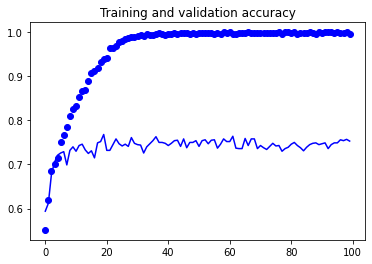

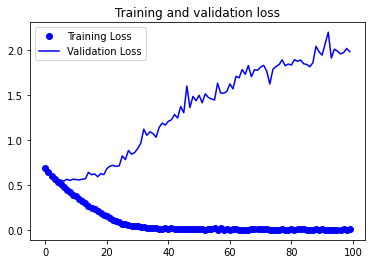

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

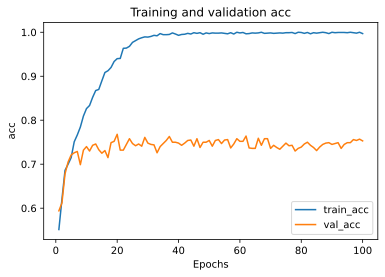

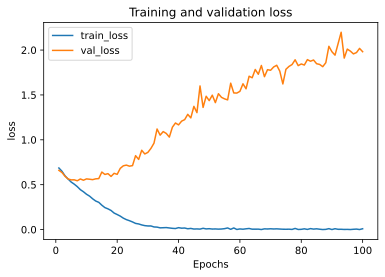

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

plot_metric(history, 'acc')
plot_metric(history, 'loss')

The graph show that we have a training accuracy of almost **100%**, while the validation accuracy is much lower in the **70%-75%** range.
It's a classic case of **Overfitting**

Our model does exceptionally well in case of images it has already seen and not so much with unseen images.

We can apply a simple yet very effective technique here called **Image Augmentation** where we change the images a bit by rotating them, squashing them, etc.

We can implement this using the ImageDataGenerator Class



```
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

Some options that are available:



*   rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
*   width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly     translate pictures vertically or horizontally
*   shear_range is for randomly applying shearing transformations
*   zoom_range is for randomly zooming inside pictures
*   horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures)
*   fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift





# **Here's the code with added Image Augmentation.**

In [20]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

# base_dir = './cats_and_dogs_filtered'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')

# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 12s 121ms/step - loss: 0.6926 - acc: 0.5205 - val_loss: 0.6870 - val_acc: 0.5440
Epoch 2/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6818 - acc: 0.5550 - val_loss: 0.6513 - val_acc: 0.6380
Epoch 3/100
100/100 [==============================] - 11s 113ms/step - loss: 0.6711 - acc: 0.5835 - val_loss: 0.6357 - val_acc: 0.6330
Epoch 4/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6505 - acc: 0.6165 - val_loss: 0.6084 - val_acc: 0.6690
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6243 - acc: 0.6435 - val_loss: 0.5876 - val_acc: 0.6900
Epoch 6/100
100/100 [==============================] - 11s 111ms/step - loss: 0.6216 - acc: 0.6505 - val_loss: 0.5774 - val_acc: 0.6970
Epoch 7/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6078 - acc: 0.6670 -

100/100 [==============================] - 11s 109ms/step - loss: 0.4184 - acc: 0.8130 - val_loss: 0.4985 - val_acc: 0.7610
Epoch 61/100
100/100 [==============================] - 12s 116ms/step - loss: 0.4194 - acc: 0.8045 - val_loss: 0.4628 - val_acc: 0.7830
Epoch 62/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4158 - acc: 0.8075 - val_loss: 0.4142 - val_acc: 0.8140
Epoch 63/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4171 - acc: 0.8110 - val_loss: 0.4401 - val_acc: 0.7920
Epoch 64/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4342 - acc: 0.7935 - val_loss: 0.4208 - val_acc: 0.8040
Epoch 65/100
100/100 [==============================] - 11s 111ms/step - loss: 0.4079 - acc: 0.8120 - val_loss: 0.4518 - val_acc: 0.7960
Epoch 66/100
100/100 [==============================] - 11s 115ms/step - loss: 0.4182 - acc: 0.8055 - val_loss: 0.4327 - val_acc: 0.7920
Epoch 67/100
100/100 [==============================] 

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

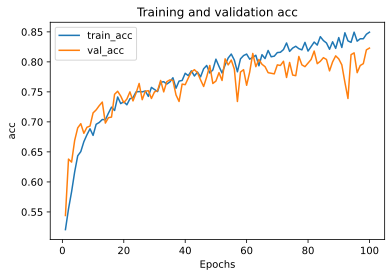

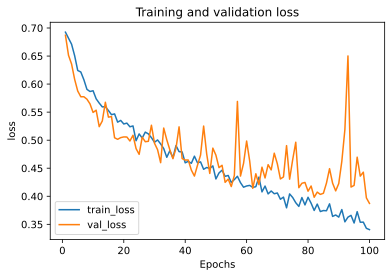

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

plot_metric(history, 'acc')
plot_metric(history, 'loss')

# Appluing Droput

As we can see, the accuracy and loss metrics have improved, but we can do better.
Let us try implementing **Droput** which would help us with overfitting.

In [24]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

# base_dir = '/tmp/cats_and_dogs_filtered'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')

# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6953 - acc: 0.5055 - val_loss: 0.6882 - val_acc: 0.6030
Epoch 2/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6894 - acc: 0.5400 - val_loss: 0.6717 - val_acc: 0.6150
Epoch 3/100
100/100 [==============================] - 11s 111ms/step - loss: 0.6757 - acc: 0.5735 - val_loss: 0.7024 - val_acc: 0.5200
Epoch 4/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6678 - acc: 0.5850 - val_loss: 0.6433 - val_acc: 0.6270
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6547 - acc: 0.6065 - val_loss: 0.6252 - val_acc: 0.6430
Epoch 6/100
100/100 [==============================] - 11s 114ms/step - loss: 0.6433 - acc: 0.6185 - val_loss: 0.6123 - val_acc: 0.6490
Epoch 7/100
100/100 [==============================] - 11s 111ms/step - loss: 0.6367 - acc: 0.6305 - val_loss: 0.5895 - val_acc: 0.6800
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 11s 114ms/step - loss: 0.4611 - acc: 0.7910 - val_loss: 0.4979 - val_acc: 0.7550
Epoch 62/100
100/100 [==============================] - 11s 114ms/step - loss: 0.4581 - acc: 0.7805 - val_loss: 0.4364 - val_acc: 0.8070
Epoch 63/100
100/100 [==============================] - 11s 112ms/step - loss: 0.4519 - acc: 0.7850 - val_loss: 0.5044 - val_acc: 0.7670
Epoch 64/100
100/100 [==============================] - 11s 111ms/step - loss: 0.4549 - acc: 0.7945 - val_loss: 0.4392 - val_acc: 0.7960
Epoch 65/100
100/100 [==============================] - 11s 112ms/step - loss: 0.4439 - acc: 0.7935 - val_loss: 0.4646 - val_acc: 0.7830
Epoch 66/100
100/100 [==============================] - 11s 111ms/step - loss: 0.4443 - acc: 0.7920 - val_loss: 0.4132 - val_acc: 0.8060
Epoch 67/100
100/100 [==============================] - 12s 120ms/step - loss: 0.4602 - acc: 0.7750 - val_loss: 0.4173 - val_acc: 0.8010
Epoch 68/100
100/100 [===================

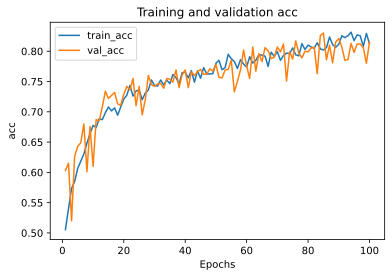

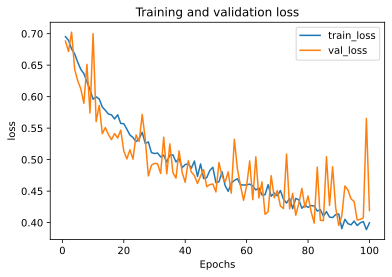

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

plot_metric(history, 'acc')
plot_metric(history, 'loss')

Both the training and validation accuracies are about **82%** with a better loss curve.

This is a decent result considering that we trained on only 2000 training images versus the original dataset of 22,500 training images.
In case of Deep Learning, performance almost always increases when we train on more data.
I expect that I will experience a similar result when working with the full dataset next.

# Save and load model

In [29]:
from tensorflow import keras
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("./save_model/my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./save_model/my_h5_model.h5")

# **Our Model in action**

Let's check out our model. The following code lets us choose one or more images from the file system. Then the images run through our model and give out results. 

In [37]:

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 150, 150


# predicting images
img = image.load_img('./i/cat_for_test.png', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = reconstructed_model.predict_classes(images, batch_size=10)
print (classes)


[[1]]


In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = './' + fn

    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = reconstructed_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

Using TensorFlow backend.


NameError: name 'files' is not defined